####preprocessing


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

The dataset was taken from the UCI machine learning repository in the name of 
Pen-Based Recognition of Handwritten Digits Data Set.

In [ ]:
  df=pd.read_csv('/content/penbased-5an-nn.csv')

In [ ]:
df.head()

,0,57,31,68,72,90,100,100.1,76,75,50,51,28,25,16,0,1
0,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16,9
1,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72,2
2,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100,5
3,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32,7
4,29,91,6,57,66,39,30,0,81,19,3,72,39,97,100,100,5


 It describes the shape of the dataset it has 10991 instances and 17 features

In [ ]:
df.shape

(10991, 17)

The below line shows that all the features are perfectly balanced and no null values 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10991 entries, 0 to 10990
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       10991 non-null  int64
 1    57     10991 non-null  int64
 2    31     10991 non-null  int64
 3    68     10991 non-null  int64
 4    72     10991 non-null  int64
 5    90     10991 non-null  int64
 6    100    10991 non-null  int64
 7    100.1  10991 non-null  int64
 8    76     10991 non-null  int64
 9    75     10991 non-null  int64
 10   50     10991 non-null  int64
 11   51     10991 non-null  int64
 12   28     10991 non-null  int64
 13   25     10991 non-null  int64
 14   16     10991 non-null  int64
 15   0      10991 non-null  int64
 16   1      10991 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


This shows that the number to be predicted are only from 0-9.
And all the features are equaly contributed for the prediction

In [ ]:
df.describe()

,0,57,31,68,72,90,100,100.1,76,75,50,51,28,25,16,0,1
count,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000,10991.000000
mean,39.508871,83.221545,41.047402,82.075789,49.762351,64.790738,51.256937,44.672550,56.447457,34.553362,60.087799,35.705031,54.604495,35.654990,47.384678,29.787644,4.431899
std,34.184852,19.043429,26.652911,21.033956,33.840402,27.323980,30.510892,29.880944,33.935001,27.597455,36.955062,27.482024,22.819212,33.128173,41.268168,35.722195,2.876891
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,75.000000,20.000000,70.000000,18.000000,48.000000,28.000000,23.000000,28.000000,8.000000,24.000000,12.000000,41.000000,6.000000,0.000000,0.000000,2.000000
50%,33.000000,88.000000,40.000000,89.000000,53.000000,70.000000,54.000000,43.000000,59.000000,34.000000,72.000000,31.000000,53.000000,28.000000,41.000000,11.000000,4.000000
75%,66.000000,100.000000,59.000000,100.000000,78.000000,86.000000,74.000000,64.500000,88.000000,55.000000,96.000000,57.000000,68.000000,51.000000,100.000000,55.000000,7.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,9.000000


creating a variable X for  training the model with Independent variables

In [ ]:

x=df.iloc[:,:-1]

In [ ]:
x.head()

,0,57,31,68,72,90,100,100.1,76,75,50,51,28,25,16,0
0,99,80,63,100,25,76,79,68,100,62,97,23,54,0,0,16
1,0,73,19,99,72,100,70,73,32,48,5,18,46,0,100,72
2,12,77,20,62,78,40,50,0,1,17,0,64,23,98,100,100
3,0,98,36,42,80,85,68,42,56,0,25,23,50,37,100,32
4,29,91,6,57,66,39,30,0,81,19,3,72,39,97,100,100


creating a variable X for  training the model with Dependent variables

In [ ]:

y=df.iloc[:,-1]

In [ ]:
y.head()

0    9
1    2
2    5
3    7
4    5
Name:  1, dtype: int64

In [ ]:
x.shape

(10991, 16)

####PCA

since the reperestion of number is in pixels some pixels may be unwanted so we are reducing those features with PCA of variance with 98%

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(0.98)
x_pca=pca.fit_transform(x)

In [ ]:
pca.explained_variance_ratio_

array([0.25986077, 0.22991379, 0.1442454 , 0.08807037, 0.05863174,
       0.04921578, 0.03411854, 0.02987144, 0.02318881, 0.01970667,
       0.01456311, 0.01280328, 0.01046417, 0.00979424])

In [ ]:
pca.n_components_

14

In [ ]:
x_pca.shape

(10991, 14)

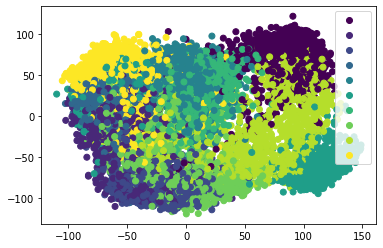

In [ ]:
plot = plt.scatter(x_pca[:,0], x_pca[:,1], c=y)
plt.legend(handles=plot.legend_elements()[0])
plt.show()

In [ ]:
x_pca= pd.DataFrame(x_pca)

In [ ]:
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-68.092095,71.511862,-28.250525,2.857626,51.933020,-3.631569,22.385768,-1.877478,-1.438700,6.622468,-10.411791,-7.405679,-10.955435,-12.672830
1,-14.121730,-96.754492,35.738662,-7.411084,5.324941,1.941331,20.703207,-34.878888,29.869702,-16.591385,1.314912,-28.783183,-23.951832,-5.470170
2,120.681711,-81.117678,42.087728,35.107335,-2.643157,24.068002,-10.484698,5.206642,7.004762,-10.175152,9.727073,10.235394,-13.152865,-2.620057
3,11.092642,-72.495060,35.726047,-4.658979,-7.722824,-20.520457,1.388278,9.018420,-6.117735,5.552435,35.418031,-4.049282,34.825862,12.914898
4,118.489829,-36.139713,50.510813,5.399568,20.674378,0.767574,3.606635,25.824870,9.661347,-21.431677,21.103967,-10.806619,-10.597196,47.529651


####standardaising the data

k-nearest neighbors is a distance based classifier.Standardization makes all variables to contribute equally to the similarity measures .

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
x_scaled_features=scaler.fit_transform(x)

In [ ]:
df_stand = pd.DataFrame(x_scaled_features,columns=x.columns)


In [ ]:
df_stand.head()

,0,57,31,68,72,90,100,100.1,76,75,50,51,28,25,16,0
0,1.740357,-0.169176,0.823685,0.852195,-0.731773,0.410254,0.909325,0.780715,1.283469,0.994580,0.998886,-0.462324,-0.026492,-1.076323,-1.148266,-0.385986
1,-1.155795,-0.536774,-0.827242,0.804650,0.657163,1.288643,0.614335,0.948054,-0.720453,0.487264,-1.490738,-0.644270,-0.377090,-1.076323,1.275019,1.181738
2,-0.804746,-0.326718,-0.789721,-0.954490,0.834474,-0.907330,-0.041198,-1.495086,-1.634006,-0.636079,-1.626043,1.029628,-1.385058,1.882019,1.275019,1.965600
3,-1.155795,0.776075,-0.189384,-1.905377,0.893578,0.739650,0.548782,-0.089444,-0.013186,-1.252106,-0.949515,-0.462324,-0.201791,0.040602,1.275019,0.061935
4,-0.307427,0.408477,-1.315016,-1.192212,0.479852,-0.943930,-0.696732,-1.495086,0.723550,-0.563605,-1.544860,1.320740,-0.683863,1.851832,1.275019,1.965600


Text(0, 0.5, 'Density')

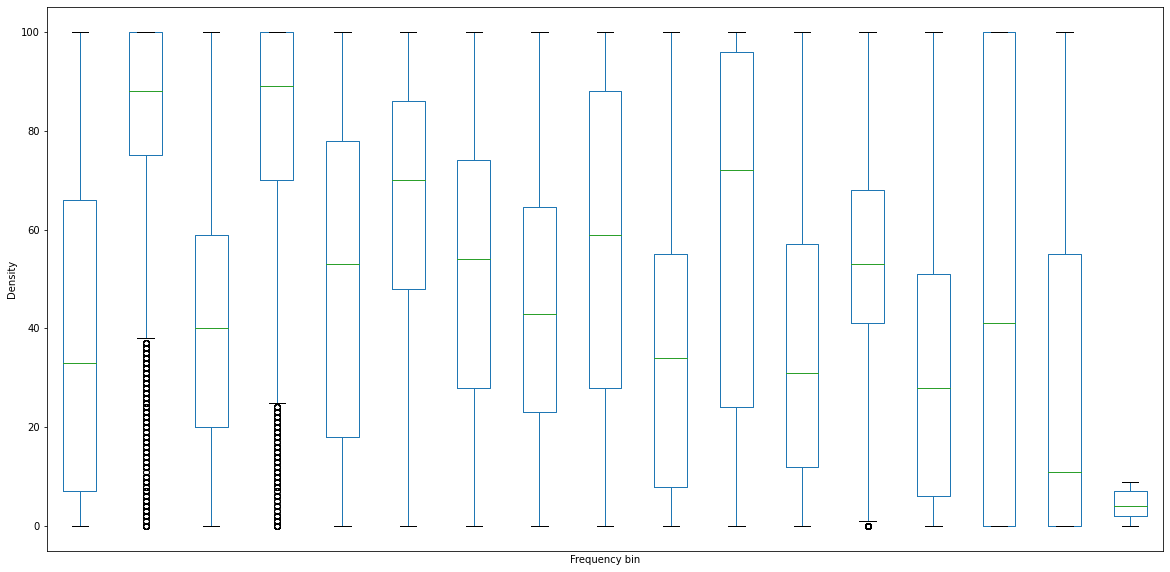

In [ ]:
df.plot.box(figsize=(20,10),xticks=[])
plt.xlabel('Frequency bin')
plt.ylabel('Density')

####Train and test spliting (80% as train 20% as test data)

In [ ]:
from sklearn.model_selection import train_test_split


Using scalled features as 

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled_features,y,train_size=0.80,test_size=0.20)

####KNN

**KNN** algorithm follows three different Distance measurements of data points.


1. Euclidean Distance
2. Manhattan Distance
3. Minkowski  Distance






In [ ]:
from sklearn.neighbors import KNeighborsClassifier



In this method we used  MINKOWSKI DISTANCE to find the nearest neighbour

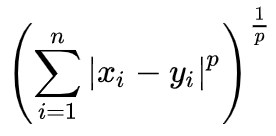

As mentioned in guide we used the metric as minkowski ,nearest neighbour as 5 and p value as 2

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)

In [ ]:
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
pred = knn.predict(x_test)
knn.score(x_test,y_test)

0.9654388358344702

####Predictions and Evaluations

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score


In [ ]:
print(confusion_matrix(y_test,pred))


[[225   0   0   0   1   0   1   0   0   0]
 [  0 213  16   4   0   0   2   4   0   0]
 [  0   3 227   0   0   0   0   0   0   0]
 [  0   2   0 203   1   0   0   1   0   0]
 [  1   1   0   1 211   2   2   0   0   2]
 [  0   0   0   4   0 194   0   0   2   3]
 [  0   0   1   0   2   0 231   0   0   1]
 [  0   0   1   1   0   0   0 242   1   1]
 [  3   0   0   0   0   1   0   1 187   1]
 [  0   2   0   1   0   4   0   1   1 190]]


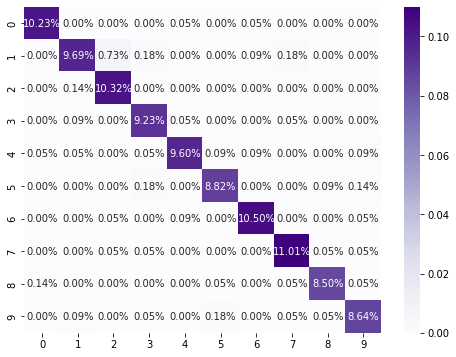

In [ ]:
plt.figure(figsize=(8,6))
pred = knn.predict(x_test)
cf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Purples');

In [ ]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       227
           1       0.96      0.89      0.93       239
           2       0.93      0.99      0.96       230
           3       0.95      0.98      0.96       207
           4       0.98      0.96      0.97       220
           5       0.97      0.96      0.96       203
           6       0.98      0.98      0.98       235
           7       0.97      0.98      0.98       246
           8       0.98      0.97      0.97       193
           9       0.96      0.95      0.96       199

    accuracy                           0.97      2199
   macro avg       0.97      0.97      0.97      2199
weighted avg       0.97      0.97      0.97      2199



####ROC AND AUC

The ROC curve plots the FPR on the X-axis and the TPR on the Y-axis.

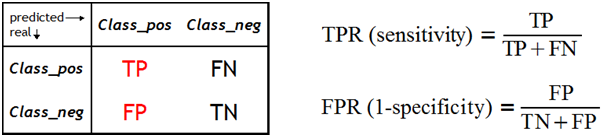

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score


In [ ]:
#prediction probablities
knn_probs = knn.predict_proba(x_test)


In [ ]:
knn_probs = knn_probs[:, 1]

In [ ]:
#Computing AUROC and ROC curve values 
from sklearn.metrics import roc_curve, roc_auc_score
a=roc_auc_score(y_test,knn_probs,multi_class='ovo')

In [ ]:
print(f'ROC-AUC score: {a}')

ROC-AUC score: 0.9949399683748859


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_pca,y,train_size=0.80,test_size=0.20)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p = 2)
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
pred = knn.predict(x_test)
knn.score(x_test,y_test)

0.954524783992724

In [ ]:
pred = knn.predict(x_test)


In [ ]:
print("prediction are:",*pred)
print("Actual values:",*y_test.tolist())

prediction are: 7 1 8 7 6 7 6 5 0 0 0 9 6 4 3 6 5 8 7 8 1 9 0 1 5 8 9 2 7 6 0 9 2 4 2 2 9 5 4 0 9 3 5 8 4 0 9 3 4 7 9 6 0 7 9 2 1 8 7 7 0 8 9 1 0 5 3 9 4 1 2 4 7 2 7 8 9 3 8 1 4 2 2 0 2 0 7 4 7 6 4 0 9 2 1 3 5 8 9 4 8 6 3 3 8 2 6 0 4 2 3 0 1 3 9 6 2 6 3 7 7 7 2 1 6 1 2 0 5 0 6 6 6 1 4 6 3 8 1 3 3 2 2 6 9 2 5 8 8 4 9 9 2 2 2 2 3 4 8 5 8 0 3 5 8 2 5 5 4 9 3 6 7 6 3 0 1 4 4 1 8 2 1 2 6 2 1 1 5 8 5 1 9 7 2 6 3 9 2 6 8 9 3 8 0 6 1 3 9 8 5 8 3 0 4 0 4 2 9 8 9 1 6 8 3 0 2 8 7 2 5 2 9 6 9 8 4 2 6 6 6 2 3 8 7 9 3 8 9 4 0 8 8 2 0 8 2 0 6 7 9 7 2 6 2 1 2 4 7 9 4 4 7 4 0 8 9 2 8 1 6 1 7 3 8 7 1 5 3 6 2 3 9 0 3 4 7 8 1 6 4 3 5 8 9 7 0 6 8 7 3 0 6 1 8 9 2 3 7 6 9 9 5 2 1 3 0 5 9 7 0 7 1 2 7 7 6 6 6 1 0 4 9 8 3 0 7 0 1 6 9 6 0 2 2 0 8 1 5 5 4 3 6 1 5 9 9 5 2 1 0 0 9 7 7 2 3 3 5 4 2 5 5 4 2 4 9 9 0 0 0 5 3 9 1 9 0 2 2 2 3 1 7 3 7 6 7 8 9 6 3 7 3 4 5 6 4 5 4 3 1 6 8 4 0 9 6 3 7 2 0 4 2 1 0 1 2 0 9 2 1 4 7 8 5 3 6 1 3 5 7 7 1 4 6 7 8 1 0 8 2 3 1 4 2 8 8 5 4 1 0 0 7 9 6 3 5 4 5 3 4 5 9 3 8 6 8 7 4 7 7 5 

#**CONCLUSION**

From the above cells we can conclude that applying PCA for the dataset will result in reduction of accuracy.
so the standardized data without performing PCA is a good option for the KNN classification model

**Question 1]**  

   The k-nearest neighbors method, how would you explain its use within the industry?


**Answer**

  The k-nearest neighbours is a supervised machine learning algorithm mostly used for classification and regression problems and some and some times KNN is also used for Recommendation systems. KNN will work by finding the nearest neighbour of the given input

   Changing the values of K that is the number of nearest neighbours will result in good accuracy. we can find it by creating a for loop and iterate over each values and we can find the best value of K to develop a model with good accuracy



  **KNN** algorithm follows three different Distance measurements of data points.


1. Euclidean Distance
2. Manhattan Distance
3. Minkowski  Distance


 

**Question 2]**    
Identify one software tool used to implement and test a k-nearest neighbors model. For this tool, provide a brief explanation of its use and purpose within a real-world scenario.

**Answer**

The software tool used for implementing the k-nearest neighbours algorithm is Scikit-Learn, a library from python. This library has inbuilt algorithms that can be accessed from the library with a function call of KNeighborsClassifier() with parameters such as the distance of the nearest neighbour and  method used to find the distance.
 
The developed model can be tested with the help of a predict function in sklearn 
Its metrics can be predicted with the help of ROC curve which can be accessed with the help of sklearn library with the help of roc_auc_score() function in it.


It is used to build the real world models faster and efficient with its pre built functions .some of the real-world applications are recommendation system, weather prediction etc..



